In [1]:
%matplotlib inline

In [2]:
import gc
import pathlib
import sys

In [3]:
import joblib
import lightgbm as lgb
import pandas as pd

In [4]:
root_dir_path = pathlib.Path("..")
data_dir_path = root_dir_path / "data"
processed_dir_path = data_dir_path / "processed"
train_path = processed_dir_path / "train.parquet"
models_dir_path = root_dir_path / "models"
model_path = models_dir_path / "model.joblib"
src_dir_path = root_dir_path / "src"

In [5]:
sys.path.append(str(src_dir_path))

In [6]:
from package.constants import *

In [7]:
train = pd.read_parquet(train_path)

In [8]:
is_train = (train["date"] >= "2015-03-28") & (train["date"] < "2016-03-28")
is_valid = train["date"] >= "2016-03-28"

In [9]:
X = train.loc[is_train, features]
X_valid = train.loc[is_valid, features]
y = train.loc[is_train, "demand"]
y_valid = train.loc[is_valid, "demand"]

In [10]:
del train
del is_train
del is_valid

In [11]:
gc.collect()

80

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11114302 entries, 33359760 to 44474061
Data columns (total 25 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   store_id                         int8   
 1   item_id                          int16  
 2   dept_id                          int8   
 3   cat_id                           int8   
 4   state_id                         int8   
 5   event_name_1                     int8   
 6   event_type_1                     int8   
 7   event_name_2                     int8   
 8   event_type_2                     int8   
 9   snap_CA                          int8   
 10  snap_TX                          int8   
 11  snap_WI                          int8   
 12  sell_price                       float32
 13  year                             int16  
 14  weekofyear                       int8   
 15  quarter                          int8   
 16  month                            int8   
 17 

In [13]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853720 entries, 44474062 to 45327781
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   store_id                         853720 non-null  int8   
 1   item_id                          853720 non-null  int16  
 2   dept_id                          853720 non-null  int8   
 3   cat_id                           853720 non-null  int8   
 4   state_id                         853720 non-null  int8   
 5   event_name_1                     853720 non-null  int8   
 6   event_type_1                     853720 non-null  int8   
 7   event_name_2                     853720 non-null  int8   
 8   event_type_2                     853720 non-null  int8   
 9   snap_CA                          853720 non-null  int8   
 10  snap_TX                          853720 non-null  int8   
 11  snap_WI                          853720 non-null  int8  

In [14]:
model = lgb.LGBMRegressor(
    importance_type="gain", learning_rate=0.05, n_estimators=1_000, random_state=0
)

In [15]:
%%time
model.fit(
    X,
    y,
    categorical_feature=categorical_features,
    early_stopping_rounds=100,
    eval_metric="rmse",
    eval_set=[(X, y), (X_valid, y_valid)],
)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat_id', 'dept_id', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2', 'item_id', 'state_id', 'store_id']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's rmse: 3.50159	training's l2: 12.2611	valid_1's rmse: 3.47846	valid_1's l2: 12.0997
Training until validation scores don't improve for 100 rounds
[2]	training's rmse: 3.40003	training's l2: 11.5602	valid_1's rmse: 3.3699	valid_1's l2: 11.3562
[3]	training's rmse: 3.30526	training's l2: 10.9248	valid_1's rmse: 3.26929	valid_1's l2: 10.6882
[4]	training's rmse: 3.21705	training's l2: 10.3494	valid_1's rmse: 3.17538	valid_1's l2: 10.083
[5]	training's rmse: 3.13505	training's l2: 9.82856	valid_1's rmse: 3.08763	valid_1's l2: 9.53346
[6]	training's rmse: 3.05883	training's l2: 9.35643	valid_1's rmse: 3.00578	valid_1's l2: 9.03474
[7]	training's rmse: 2.9881	training's l2: 8.92876	valid_1's rmse: 2.92974	valid_1's l2: 8.58336
[8]	training's rmse: 2.92249	training's l2: 8.54092	valid_1's rmse: 2.85906	valid_1's l2: 8.17422
[9]	training's rmse: 2.86187	training's l2: 8.1903	valid_1's rmse: 2.79378	valid_1's l2: 7.8052
[10]	training's rmse: 2.80572	training's l2: 7.87205	valid_1'

[84]	training's rmse: 2.1071	training's l2: 4.43988	valid_1's rmse: 2.01192	valid_1's l2: 4.04781
[85]	training's rmse: 2.10631	training's l2: 4.43654	valid_1's rmse: 2.01141	valid_1's l2: 4.04577
[86]	training's rmse: 2.10559	training's l2: 4.43351	valid_1's rmse: 2.01108	valid_1's l2: 4.04443
[87]	training's rmse: 2.10497	training's l2: 4.43089	valid_1's rmse: 2.01088	valid_1's l2: 4.04363
[88]	training's rmse: 2.10403	training's l2: 4.42694	valid_1's rmse: 2.01053	valid_1's l2: 4.04222
[89]	training's rmse: 2.10316	training's l2: 4.4233	valid_1's rmse: 2.0102	valid_1's l2: 4.04091
[90]	training's rmse: 2.10241	training's l2: 4.42011	valid_1's rmse: 2.00965	valid_1's l2: 4.03868
[91]	training's rmse: 2.10176	training's l2: 4.41738	valid_1's rmse: 2.00939	valid_1's l2: 4.03765
[92]	training's rmse: 2.10107	training's l2: 4.41449	valid_1's rmse: 2.00904	valid_1's l2: 4.03624
[93]	training's rmse: 2.10037	training's l2: 4.41154	valid_1's rmse: 2.00876	valid_1's l2: 4.03513
[94]	training

[167]	training's rmse: 2.06428	training's l2: 4.26126	valid_1's rmse: 1.99702	valid_1's l2: 3.98809
[168]	training's rmse: 2.06405	training's l2: 4.26028	valid_1's rmse: 1.99702	valid_1's l2: 3.98808
[169]	training's rmse: 2.06378	training's l2: 4.2592	valid_1's rmse: 1.99701	valid_1's l2: 3.98806
[170]	training's rmse: 2.06335	training's l2: 4.2574	valid_1's rmse: 1.99663	valid_1's l2: 3.98655
[171]	training's rmse: 2.06301	training's l2: 4.256	valid_1's rmse: 1.99657	valid_1's l2: 3.98629
[172]	training's rmse: 2.06259	training's l2: 4.25429	valid_1's rmse: 1.99635	valid_1's l2: 3.98541
[173]	training's rmse: 2.06231	training's l2: 4.25311	valid_1's rmse: 1.99624	valid_1's l2: 3.98499
[174]	training's rmse: 2.062	training's l2: 4.25186	valid_1's rmse: 1.99638	valid_1's l2: 3.98553
[175]	training's rmse: 2.06173	training's l2: 4.25074	valid_1's rmse: 1.99637	valid_1's l2: 3.9855
[176]	training's rmse: 2.06115	training's l2: 4.24835	valid_1's rmse: 1.99625	valid_1's l2: 3.98503
[177]	t

[250]	training's rmse: 2.04091	training's l2: 4.1653	valid_1's rmse: 1.99377	valid_1's l2: 3.97513
[251]	training's rmse: 2.04073	training's l2: 4.16458	valid_1's rmse: 1.99382	valid_1's l2: 3.97531
[252]	training's rmse: 2.04062	training's l2: 4.16412	valid_1's rmse: 1.99382	valid_1's l2: 3.97532
[253]	training's rmse: 2.04045	training's l2: 4.16344	valid_1's rmse: 1.99386	valid_1's l2: 3.97549
[254]	training's rmse: 2.04014	training's l2: 4.16217	valid_1's rmse: 1.9936	valid_1's l2: 3.97445
[255]	training's rmse: 2.03981	training's l2: 4.16084	valid_1's rmse: 1.99357	valid_1's l2: 3.97433
[256]	training's rmse: 2.03965	training's l2: 4.16016	valid_1's rmse: 1.99357	valid_1's l2: 3.97432
[257]	training's rmse: 2.03932	training's l2: 4.15881	valid_1's rmse: 1.99358	valid_1's l2: 3.97438
[258]	training's rmse: 2.03913	training's l2: 4.15805	valid_1's rmse: 1.99352	valid_1's l2: 3.97412
[259]	training's rmse: 2.03894	training's l2: 4.15726	valid_1's rmse: 1.99352	valid_1's l2: 3.97411
[2

[333]	training's rmse: 2.02388	training's l2: 4.09609	valid_1's rmse: 1.99226	valid_1's l2: 3.9691
[334]	training's rmse: 2.02359	training's l2: 4.09493	valid_1's rmse: 1.99223	valid_1's l2: 3.96899
[335]	training's rmse: 2.02353	training's l2: 4.09469	valid_1's rmse: 1.99225	valid_1's l2: 3.96908
[336]	training's rmse: 2.0234	training's l2: 4.09417	valid_1's rmse: 1.99223	valid_1's l2: 3.969
[337]	training's rmse: 2.02322	training's l2: 4.09343	valid_1's rmse: 1.99222	valid_1's l2: 3.96894
[338]	training's rmse: 2.02299	training's l2: 4.09249	valid_1's rmse: 1.99216	valid_1's l2: 3.96869
[339]	training's rmse: 2.02291	training's l2: 4.09215	valid_1's rmse: 1.99212	valid_1's l2: 3.96853
[340]	training's rmse: 2.02272	training's l2: 4.09139	valid_1's rmse: 1.99205	valid_1's l2: 3.96825
[341]	training's rmse: 2.02257	training's l2: 4.0908	valid_1's rmse: 1.99204	valid_1's l2: 3.96822
[342]	training's rmse: 2.02244	training's l2: 4.09028	valid_1's rmse: 1.99212	valid_1's l2: 3.96853
[343]

[416]	training's rmse: 2.01081	training's l2: 4.04334	valid_1's rmse: 1.991	valid_1's l2: 3.96406
[417]	training's rmse: 2.01072	training's l2: 4.043	valid_1's rmse: 1.99099	valid_1's l2: 3.96404
[418]	training's rmse: 2.01063	training's l2: 4.04264	valid_1's rmse: 1.99099	valid_1's l2: 3.96403
[419]	training's rmse: 2.01057	training's l2: 4.04239	valid_1's rmse: 1.99105	valid_1's l2: 3.96427
[420]	training's rmse: 2.01026	training's l2: 4.04116	valid_1's rmse: 1.99109	valid_1's l2: 3.96444
[421]	training's rmse: 2.01004	training's l2: 4.04025	valid_1's rmse: 1.99108	valid_1's l2: 3.9644
[422]	training's rmse: 2.00991	training's l2: 4.03973	valid_1's rmse: 1.99113	valid_1's l2: 3.96459
[423]	training's rmse: 2.00984	training's l2: 4.03946	valid_1's rmse: 1.99107	valid_1's l2: 3.96436
[424]	training's rmse: 2.00975	training's l2: 4.03909	valid_1's rmse: 1.99114	valid_1's l2: 3.96464
[425]	training's rmse: 2.00969	training's l2: 4.03885	valid_1's rmse: 1.99115	valid_1's l2: 3.96466
[426]

[499]	training's rmse: 1.99925	training's l2: 3.99702	valid_1's rmse: 1.99019	valid_1's l2: 3.96084
[500]	training's rmse: 1.9991	training's l2: 3.9964	valid_1's rmse: 1.99025	valid_1's l2: 3.9611
[501]	training's rmse: 1.99896	training's l2: 3.99584	valid_1's rmse: 1.99027	valid_1's l2: 3.96116
[502]	training's rmse: 1.9989	training's l2: 3.9956	valid_1's rmse: 1.99027	valid_1's l2: 3.96118
[503]	training's rmse: 1.99881	training's l2: 3.99522	valid_1's rmse: 1.99027	valid_1's l2: 3.96119
[504]	training's rmse: 1.99868	training's l2: 3.99472	valid_1's rmse: 1.9903	valid_1's l2: 3.96129
[505]	training's rmse: 1.99845	training's l2: 3.99378	valid_1's rmse: 1.9904	valid_1's l2: 3.96167
[506]	training's rmse: 1.9983	training's l2: 3.99322	valid_1's rmse: 1.99041	valid_1's l2: 3.96175
[507]	training's rmse: 1.99822	training's l2: 3.99287	valid_1's rmse: 1.99041	valid_1's l2: 3.96175
[508]	training's rmse: 1.99817	training's l2: 3.99267	valid_1's rmse: 1.99039	valid_1's l2: 3.96164
[509]	tr

[582]	training's rmse: 1.98811	training's l2: 3.95258	valid_1's rmse: 1.98995	valid_1's l2: 3.9599
[583]	training's rmse: 1.98803	training's l2: 3.95225	valid_1's rmse: 1.98993	valid_1's l2: 3.95981
[584]	training's rmse: 1.98789	training's l2: 3.95169	valid_1's rmse: 1.98995	valid_1's l2: 3.95991
[585]	training's rmse: 1.9877	training's l2: 3.95095	valid_1's rmse: 1.98988	valid_1's l2: 3.95962
[586]	training's rmse: 1.9875	training's l2: 3.95015	valid_1's rmse: 1.99006	valid_1's l2: 3.96034
[587]	training's rmse: 1.98738	training's l2: 3.94967	valid_1's rmse: 1.99007	valid_1's l2: 3.96038
[588]	training's rmse: 1.98734	training's l2: 3.94954	valid_1's rmse: 1.99007	valid_1's l2: 3.96037
[589]	training's rmse: 1.98725	training's l2: 3.94917	valid_1's rmse: 1.99009	valid_1's l2: 3.96045
[590]	training's rmse: 1.98713	training's l2: 3.94867	valid_1's rmse: 1.99009	valid_1's l2: 3.96047
[591]	training's rmse: 1.98708	training's l2: 3.94849	valid_1's rmse: 1.99008	valid_1's l2: 3.96041
[59

[665]	training's rmse: 1.97764	training's l2: 3.91104	valid_1's rmse: 1.98982	valid_1's l2: 3.95937
[666]	training's rmse: 1.97742	training's l2: 3.91021	valid_1's rmse: 1.98981	valid_1's l2: 3.95936
[667]	training's rmse: 1.97733	training's l2: 3.90983	valid_1's rmse: 1.98971	valid_1's l2: 3.95896
[668]	training's rmse: 1.97729	training's l2: 3.90969	valid_1's rmse: 1.98972	valid_1's l2: 3.95897
[669]	training's rmse: 1.97717	training's l2: 3.90922	valid_1's rmse: 1.98969	valid_1's l2: 3.95886
[670]	training's rmse: 1.97711	training's l2: 3.90896	valid_1's rmse: 1.98968	valid_1's l2: 3.95881
[671]	training's rmse: 1.9769	training's l2: 3.90814	valid_1's rmse: 1.98952	valid_1's l2: 3.9582
[672]	training's rmse: 1.97676	training's l2: 3.90758	valid_1's rmse: 1.98948	valid_1's l2: 3.95804
[673]	training's rmse: 1.9767	training's l2: 3.90733	valid_1's rmse: 1.98946	valid_1's l2: 3.95796
[674]	training's rmse: 1.97658	training's l2: 3.90688	valid_1's rmse: 1.98943	valid_1's l2: 3.95785
[67

[748]	training's rmse: 1.96886	training's l2: 3.87639	valid_1's rmse: 1.98949	valid_1's l2: 3.95807
[749]	training's rmse: 1.96876	training's l2: 3.876	valid_1's rmse: 1.9895	valid_1's l2: 3.95811
[750]	training's rmse: 1.96868	training's l2: 3.87568	valid_1's rmse: 1.98941	valid_1's l2: 3.95777
[751]	training's rmse: 1.96855	training's l2: 3.87517	valid_1's rmse: 1.98943	valid_1's l2: 3.95783
[752]	training's rmse: 1.96838	training's l2: 3.87452	valid_1's rmse: 1.98944	valid_1's l2: 3.95789
[753]	training's rmse: 1.96821	training's l2: 3.87385	valid_1's rmse: 1.98957	valid_1's l2: 3.95838
[754]	training's rmse: 1.96817	training's l2: 3.87371	valid_1's rmse: 1.98951	valid_1's l2: 3.95813
[755]	training's rmse: 1.96805	training's l2: 3.87321	valid_1's rmse: 1.9895	valid_1's l2: 3.95812
[756]	training's rmse: 1.96794	training's l2: 3.87281	valid_1's rmse: 1.9895	valid_1's l2: 3.9581
[757]	training's rmse: 1.96787	training's l2: 3.87251	valid_1's rmse: 1.98961	valid_1's l2: 3.95856
[758]	

[831]	training's rmse: 1.96109	training's l2: 3.84589	valid_1's rmse: 1.98964	valid_1's l2: 3.95865
[832]	training's rmse: 1.96099	training's l2: 3.8455	valid_1's rmse: 1.9897	valid_1's l2: 3.95889
[833]	training's rmse: 1.96097	training's l2: 3.84539	valid_1's rmse: 1.9897	valid_1's l2: 3.95889
[834]	training's rmse: 1.96085	training's l2: 3.84492	valid_1's rmse: 1.98968	valid_1's l2: 3.95884
Early stopping, best iteration is:
[734]	training's rmse: 1.97051	training's l2: 3.8829	valid_1's rmse: 1.98914	valid_1's l2: 3.95667
CPU times: user 6h 5min 49s, sys: 5min 12s, total: 6h 11min 2s
Wall time: 34min 25s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

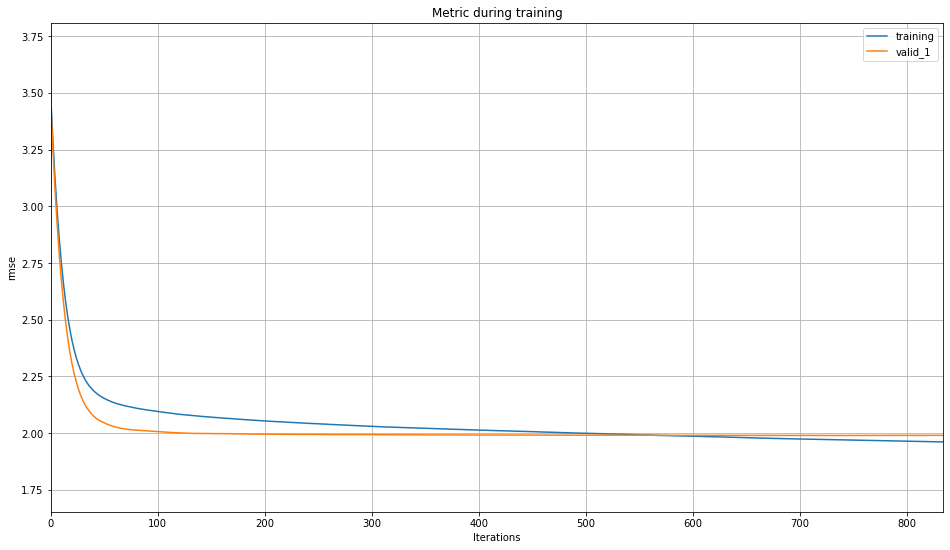

In [16]:
ax = lgb.plot_metric(model, metric="rmse", figsize=(16, 9))

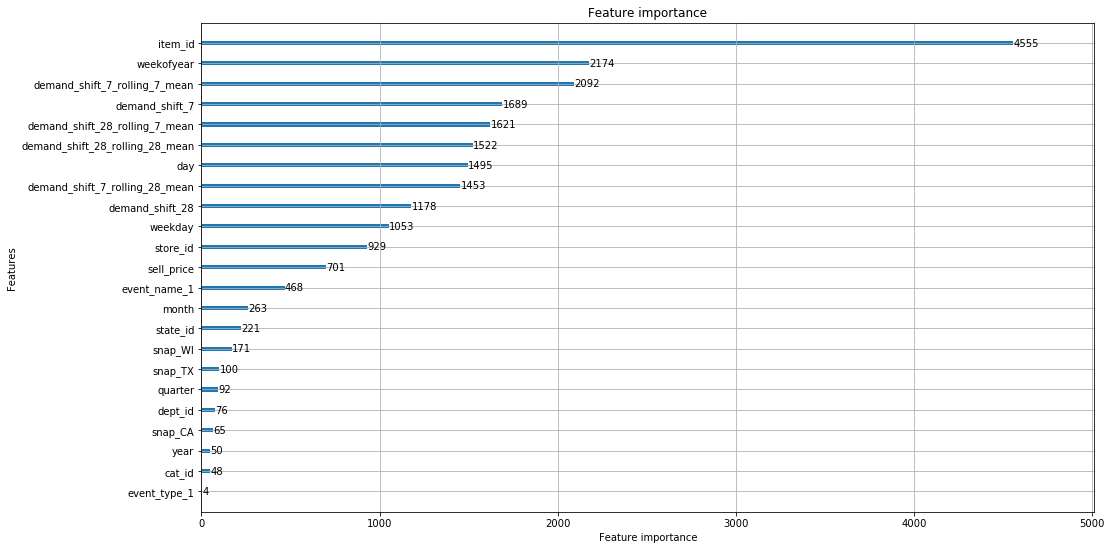

In [17]:
ax = lgb.plot_importance(model, figsize=(16, 9))

In [18]:
joblib.dump(model, model_path)

['../models/model.joblib']